<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task2(part2%2C3%2C4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# Load libraries
import numpy as np # numerical python for ND array
import matplotlib.pyplot as plt # to make plots and show images
import os

Mounted at /content/drive


In [33]:
####### Read raw file 
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            #print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, bands, lines)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          #print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     

# part 2
Open ENVI from Japanese spectral camera

In [4]:
path2 = '/content/drive/MyDrive/ASI/savedata/colorChecker.nh7'
fopen = open(path2, "rb")
raw = np.fromfile(fopen, dtype=np.uint16) #uint16 float32, 2bytes np.uint16
#count=spatial_pixels*sample_lines*spectral_bands
print(f"size: {raw.shape}")  #need to know the file size
fopen.close()

size: (197918720,)


Known the sensor size is 1280x1024, and the data type is unit16

In [5]:
lines = 1024
samples = 1280
bands = int(197918720/1280/1024) # 151
spectral_image = np.reshape(raw, (lines, bands, samples))

spectral_image.shape:  (1024, 151, 1280)


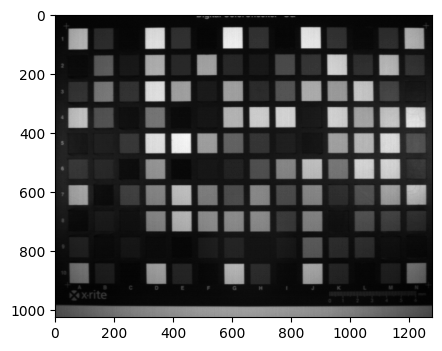

In [6]:
print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,60,:], cmap='gray')
plt.show()

# part 3
Open ENVI from Kuopio microsurgery center

In [35]:
# Read wavelengths from hdr file
hdr_path = '/content/drive/MyDrive/ASI/savedata/Image of coin (Senop camera)/HSI_snapshot__20212101144836.hdr'
f=open(hdr_path, "r")
filelines = f.readlines()
print(filelines)

['ENVI\n', 'description = Senop HSC-2 7002730\n', 'wavelength units = nm\n', 'samples = 1024\n', 'lines = 1024\n', 'file type = ENVI\n', 'interleave = BSQ\n', 'byte order = 1\n', 'data type = 12\n', 'senop sequence name = Sequence 1\n', 'bands = 18\n', 'senop acquisition mode = 12\n', 'acquisition time = 2021-01-21T12:48:31.483730000Z\n', 'wavelength = {500.0,526.5,552.9,579.4,605.9,632.4,658.8,685.3,711.8,738.2,764.7,791.2,817.6,844.1,870.6,897.1,923.5,950.0}\n', 'fwhm = {0.0,10.0,10.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,9.0,10.0,9.0,9.0,0.0,0.0}\n', 'data gain values = {0.000000,0.000114,0.000110,0.000116,0.000121,0.000141,0.000125,0.000114,0.000122,0.000133,0.000139,0.000168,0.000120,0.000151,0.000166,0.000215,0.000000,0.000000}\n', 'solar irradiance = {0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000}\n', 'senop sequence order = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,

In [21]:
samples = 1024
lines = 1024
bands = 18

In [22]:
path3 = '/content/drive/MyDrive/ASI/savedata/Image of coin (Senop camera)/HSI_snapshot__20212101144836.dat'
fopen = open(path3, "rb")
raw = np.fromfile(fopen, dtype='>u2') #datatype 12
print(f"size: {raw.shape}")
fopen.close()

size: (18874368,)


spectral_image.shape:  (18, 1024, 1024)


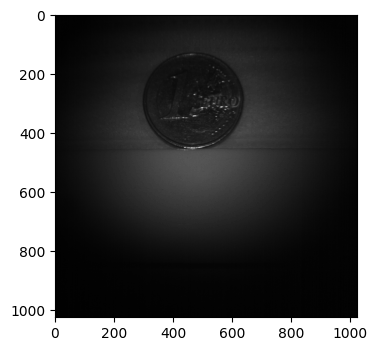

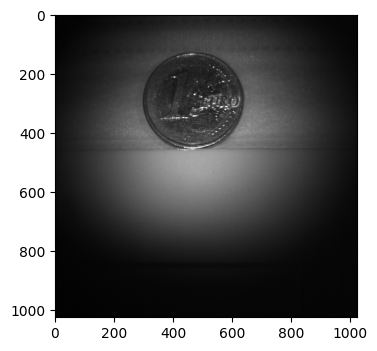

In [23]:
spectral_image = np.reshape(raw,(bands,lines,samples))

print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[1,:,:], cmap='gray')
plt.show()
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[4,:,:], cmap='gray')
plt.show()

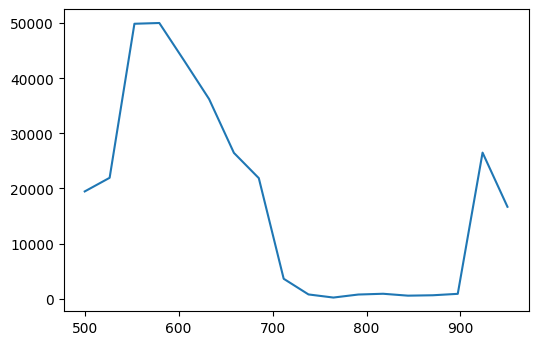

In [36]:
x = [500.0,526.5,552.9,579.4,605.9,632.4,658.8,685.3,711.8,738.2,764.7,791.2,817.6,844.1,870.6,897.1,923.5,950.0]
plt.plot(x,spectral_image[:,500,500])
plt.show()

#part 4
Save ENVI spectral image with interleave = bil/bip

In [47]:
# Read wavelengths from hdr file
hdr_path = '/content/drive/MyDrive/ASI/Lectures+Exercises/Lecture 2/Spectral images/Colorchecker 121 ms (for Freelook demo)/capture/Colorchecker.hdr'
f=open(hdr_path, "r")
filelines = f.readlines()
print(filelines)
[samples, bands, lines, waves] = read_hdr(hdr_path)

['ENVI\n', 'description = {Data recorded with Specim IQ}\n', 'samples = 512\n', 'lines = 512\n', 'bands = 204\n', 'header offset = 0\n', 'file type = ENVI\n', 'data type = 12\n', 'interleave = BIL\n', 'sensor type = SPECIM IQ\n', 'byte order = 0\n', 'default bands = {70,53,19}\n', 'latitude = 0.00000000\n', 'longitude = 0.00000000\n', 'acquisition date = 29-09-2020\n', 'errors = none\n', 'binning = {1,1}\n', 'tint = 121\n', 'fps = 8.26446\n', 'wavelength = {\n', '    397.32,\n', '    400.20,\n', '    403.09,\n', '    405.97,\n', '    408.85,\n', '    411.74,\n', '    414.63,\n', '    417.52,\n', '    420.40,\n', '    423.29,\n', '    426.19,\n', '    429.08,\n', '    431.97,\n', '    434.87,\n', '    437.76,\n', '    440.66,\n', '    443.56,\n', '    446.45,\n', '    449.35,\n', '    452.25,\n', '    455.16,\n', '    458.06,\n', '    460.96,\n', '    463.87,\n', '    466.77,\n', '    469.68,\n', '    472.59,\n', '    475.50,\n', '    478.41,\n', '    481.32,\n', '    484.23,\n', '    4

size: (53477376,)
spectral_image.shape:  (512, 204, 512)


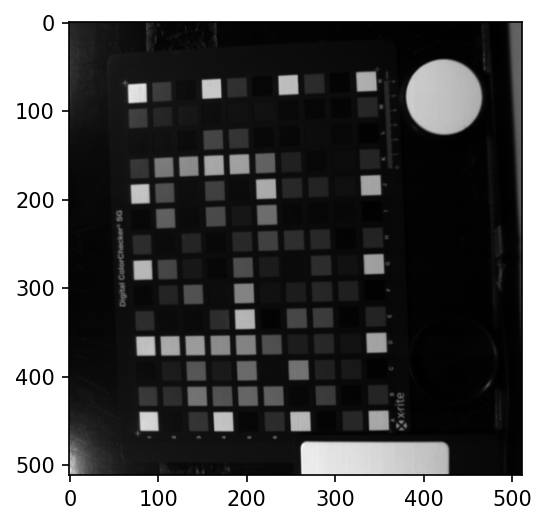

In [48]:
path4 = '/content/drive/MyDrive/ASI/Lectures+Exercises/Lecture 2/Spectral images/Colorchecker 121 ms (for Freelook demo)/capture/Colorchecker.raw'
fopen = open(path4, "rb")
raw = np.fromfile(fopen, dtype=np.uint16)
print(f"size: {raw.shape}")
fopen.close()

spectral_image = np.reshape(raw, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 150 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,10,:], cmap='gray')
plt.show()

In [54]:
rotated = np.rot90(spectral_image, k=1, axes=(1,2))
#rotated = spectral_image.swapaxes(1,2)

In [55]:
#copy the hdr header-file
import shutil
des = '/content/drive/MyDrive/ASI/savedata/Colorchecker 121/rotated.hdr'
shutil.copyfile(hdr_path, des)
print("File copied successfully.")

File copied successfully.


In [56]:
f=open(des, "r")
filelines = f.readlines()
f.close()
for fileline in filelines:
  if 'interleave' in fileline.lower():
    fileline = fileline.replace("BIL","BIP")
    print(fileline)
#print(filelines)

interleave = BIP

['ENVI\n', 'description = {Data recorded with Specim IQ}\n', 'samples = 512\n', 'lines = 512\n', 'bands = 204\n', 'header offset = 0\n', 'file type = ENVI\n', 'data type = 12\n', 'interleave = BIL\n', 'sensor type = SPECIM IQ\n', 'byte order = 0\n', 'default bands = {70,53,19}\n', 'latitude = 0.00000000\n', 'longitude = 0.00000000\n', 'acquisition date = 29-09-2020\n', 'errors = none\n', 'binning = {1,1}\n', 'tint = 121\n', 'fps = 8.26446\n', 'wavelength = {\n', '    397.32,\n', '    400.20,\n', '    403.09,\n', '    405.97,\n', '    408.85,\n', '    411.74,\n', '    414.63,\n', '    417.52,\n', '    420.40,\n', '    423.29,\n', '    426.19,\n', '    429.08,\n', '    431.97,\n', '    434.87,\n', '    437.76,\n', '    440.66,\n', '    443.56,\n', '    446.45,\n', '    449.35,\n', '    452.25,\n', '    455.16,\n', '    458.06,\n', '    460.96,\n', '    463.87,\n', '    466.77,\n', '    469.68,\n', '    472.59,\n', '    475.50,\n', '    478.41,\n', '    481.32,\n', '    

In [58]:
save_path = '/content/drive/MyDrive/ASI/savedata/Colorchecker 121/rotated.raw'
rotated.astype(np.uint16).tofile(save_path)